
# My Personal Notebook for Linear Regression Project


### This is an import of all the libraries needed to complete the tasks below in this notebook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

### Here I am pulling in the CSV of the King County housing data dataset to the variable 'data'

In [2]:
data = pd.read_csv('../../../data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


#### Here I have changed the name of my variable from 'data' to 'df'

In [3]:
df = data

In [4]:
df = df.drop_duplicates()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [5]:
df.date = df["date"].map(lambda x: x.split("/")[0])
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [6]:
df['date'] = df['date'].map(lambda x: int(x))

In [7]:
df['bed_bath'] = df['bedrooms']/df['bathrooms']

In [8]:
df['bath_bed'] = df['bathrooms']/df['bedrooms']

In [9]:
df['bed_bath'] = df['bed_bath'].map(lambda x: float(x))

In [10]:
df['bath_bed'] = df['bath_bed'].map(lambda x: float(x))

In [11]:
df.bathrooms = df['bathrooms']*df['bedrooms']

In [12]:
for i in range (0, len(df)):
    if df['date'].iloc[i] == 1:
        df['date'].iloc[i] = 4
    elif df['date'].iloc[i] == 2:
        df['date'].iloc[i] = 4
    elif df['date'].iloc[i] == 3:
        df['date'].iloc[i] = 1
    elif df['date'].iloc[i] == 4:
        df['date'].iloc[i] = 1
    elif df['date'].iloc[i] == 5:
        df['date'].iloc[i] = 1
    elif df['date'].iloc[i] == 6:
        df['date'].iloc[i] = 2
    elif df['date'].iloc[i] == 7:
        df['date'].iloc[i] = 2
    elif df['date'].iloc[i] == 8:
        df['date'].iloc[i] = 2
    elif df['date'].iloc[i] == 9:
        df['date'].iloc[i] = 3
    elif df['date'].iloc[i] == 10:
        df['date'].iloc[i] = 3
    elif df['date'].iloc[i] == 11:
        df['date'].iloc[i] = 3
    elif df['date'].iloc[i] == 12:
        df['date'].iloc[i] = 4

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
df.waterfront = df.waterfront.replace(np.NaN, 0.0)

In [14]:
df_corr_price = df.corr()['price'].map(abs).sort_values(ascending=False)
df_corr_price

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.516874
view             0.395734
bedrooms         0.308787
lat              0.306692
bath_bed         0.281227
waterfront       0.264306
floors           0.256804
bed_bath         0.249948
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
condition        0.036056
date             0.032963
long             0.022036
id               0.016772
Name: price, dtype: float64

In [15]:
df_corr_grade = df.corr()['grade'].map(abs).sort_values(ascending=False)
df_corr_grade

grade            1.000000
sqft_living      0.762779
sqft_above       0.756073
sqft_living15    0.713867
price            0.667951
bathrooms        0.588452
floors           0.458794
yr_built         0.447865
bath_bed         0.409125
bed_bath         0.403333
bedrooms         0.356563
view             0.249727
long             0.200341
zipcode          0.185771
condition        0.146896
sqft_lot15       0.120981
sqft_lot         0.114731
lat              0.113575
waterfront       0.082818
yr_renovated     0.016669
date             0.010554
id               0.008188
Name: grade, dtype: float64

In [16]:
df.grade.mean()

7.657915451220076

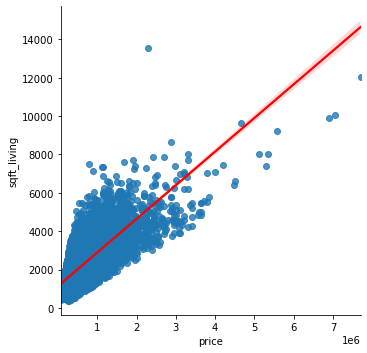

In [17]:
sns.lmplot(x='price', y='sqft_living', data=df, line_kws={'color': 'red'})
plt.show();

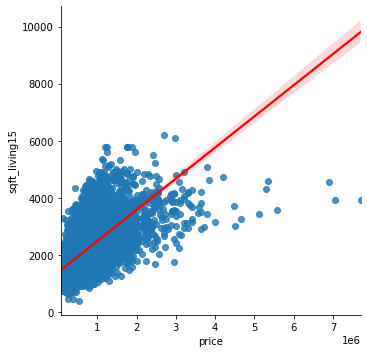

In [18]:
sns.lmplot(x='price', y='sqft_living15', data=df, line_kws={'color': 'red'})
plt.show();

In [19]:
df.price.median()

450000.0

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
predictors = df.drop(['id', 'sqft_basement', 'price'], axis = 1)
predict= '+'.join(predictors)
f = 'price ~' + predict
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     2208.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:22:28   Log-Likelihood:            -2.4091e+05
No. Observations:               17704   AIC:                         4.819e+05
Df Residuals:                   17683   BIC:                         4.820e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.031e+07   3.17e+06      3.252      0.001     4.1e+06    1.65e+07
date          -9836.1279   1383.153     -7.111      0.000   -1.25e+04   -7125.013
bedrooms      -1.634e+05   5348.317    -30.560      0.000   -1.74e+05   -1.53e+05
bathrooms      3.652e+04   1260.697     28.968      0.000     3.4e+04     3.9e+04
sqft_living     143.9776      4.701     30.628      0.000     134.763     153.192
sqft_lot          0.0724      0.051      1.420      0.156      -0.028       0.172
floors         1.206e+04   3925.533      3.073      0.002    4367.037    1.98e+04
waterfront     5.974e+05   1.96e+04     30.439      0.000    5.59e+05    6.36e+05
view           5.183e+04   2306.659     22.469      0.000    4.73e+04    5.63e+04
condition      3.445e+04   2548.105     13.520      0.000    2.95e+04    3.94e+04
grade          9.824e+04   2350.332     41.798      0.000    9.36e+04    1.03e+05
sqft_above       17.7012      4.753      3.724      0.000       8.384      27.018
yr_built      -2269.1481     78.661    -28.847      0.000   -2423.332   -2114.964
yr_renovated     28.3662      3.962      7.159      0.000      20.600      36.132
zipcode        -612.0935     35.574    -17.206      0.000    -681.822    -542.365
lat            5.978e+05   1.16e+04     51.603      0.000    5.75e+05    6.21e+05
long           -2.05e+05   1.42e+04    -14.442      0.000   -2.33e+05   -1.77e+05
sqft_living15    31.0623      3.770      8.240      0.000      23.674      38.451
sqft_lot15       -0.3356      0.078     -4.302      0.000      -0.489      -0.183
bed_bath       1.204e+05   5365.211     22.435      0.000     1.1e+05    1.31e+05
bath_bed       5.825e+04    1.6e+04      3.646      0.000    2.69e+04    8.96e+04
==============================================================================
Omnibus:                    13267.027   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1006585.641
Skew:                           2.974   Prob(JB):                         0.00
Kurtosis:                      39.458   Cond. No.                     2.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Split data low < 300,000 // mid 300,000 - 650,000 // high >= 650,000
#### because the median is 450,000 and the mean is 540,000 in order to get a cleaner slice of the data this is why i chose these numbers

In [21]:
df_low_price = df.loc[df['price']< 300000]
df_low_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,bath_bed
0,7129300520,3,221900.0,3,3.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3.000000,0.333333
2,5631500400,4,180000.0,2,2.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2.000000,0.500000
6,1321400060,2,257500.0,3,6.75,1715,6819,2.0,0.0,0.0,...,?,1995,0.0,98003,47.3097,-122.327,2238,6819,1.333333,0.750000
7,2008000270,4,291850.0,3,4.50,1060,9711,1.0,0.0,NaN,...,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,2.000000,0.500000
8,2414600126,1,229500.0,3,3.00,1780,7470,1.0,0.0,0.0,...,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,3.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21510,1760650820,1,290000.0,3,6.75,1610,3764,2.0,0.0,0.0,...,0.0,2012,0.0,98042,47.3589,-122.083,1610,3825,1.333333,0.750000
21534,880000205,2,249000.0,3,6.00,1260,1125,2.0,0.0,0.0,...,450.0,2011,0.0,98106,47.5262,-122.361,1260,1172,1.500000,0.666667
21556,6056111067,2,230000.0,3,5.25,1140,1201,2.0,0.0,0.0,...,0.0,2014,NaN,98108,47.5637,-122.295,1210,1552,1.714286,0.583333
21569,3832050760,2,270000.0,3,7.50,1870,5000,2.0,0.0,0.0,...,0.0,2009,0.0,98042,47.3339,-122.055,2170,5399,1.200000,0.833333


In [22]:
df_low_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4428 entries, 0 to 21586
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4428 non-null   int64  
 1   date           4428 non-null   int64  
 2   price          4428 non-null   float64
 3   bedrooms       4428 non-null   int64  
 4   bathrooms      4428 non-null   float64
 5   sqft_living    4428 non-null   int64  
 6   sqft_lot       4428 non-null   int64  
 7   floors         4428 non-null   float64
 8   waterfront     4428 non-null   float64
 9   view           4414 non-null   float64
 10  condition      4428 non-null   int64  
 11  grade          4428 non-null   int64  
 12  sqft_above     4428 non-null   int64  
 13  sqft_basement  4428 non-null   object 
 14  yr_built       4428 non-null   int64  
 15  yr_renovated   3637 non-null   float64
 16  zipcode        4428 non-null   int64  
 17  lat            4428 non-null   float64
 18  long   

In [56]:
continuous = ['price', 'sqft_living', 'sqft_above']

categorical = ['condition', 'grade', 'bathrooms']

df_log = np.log(df[continuous])
df_log.columns = [f"{column}_log" for column in df[continuous]]

df_norm = (np.log(df[continuous]) - np.mean(np.log(df[continuous])))/np.std(np.log(df[continuous]))
df_norm.columns = [f"{column}_log" for column in df[continuous]]

df_ohe = pd.get_dummies(df[categorical], drop_first = True)

df_final = pd.concat([df_norm, df_ohe], axis = 1)

In [24]:
predictors_low = df_low_price.drop(['id', 'sqft_basement', 'price'], axis = 1)
predict_low= '+'.join(predictors_low)
f = 'price ~' + predict_low
model = ols(formula=f, data=df_low_price).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     93.69
Date:                Tue, 29 Jun 2021   Prob (F-statistic):          8.45e-309
Time:                        17:22:28   Log-Likelihood:                -43093.
No. Observations:                3625   AIC:                         8.623e+04
Df Residuals:                    3604   BIC:                         8.636e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.287e+06   1.09e+06     -3.927      0.000   -6.43e+06   -2.15e+06
date          -1215.4952    546.134     -2.226      0.026   -2286.258    -144.733
bedrooms       4702.8044   3983.194      1.181      0.238   -3106.735    1.25e+04
bathrooms      -332.3096   1153.797     -0.288      0.773   -2594.469    1929.850
sqft_living      26.1609      2.813      9.299      0.000      20.645      31.677
sqft_lot         -0.0012      0.025     -0.046      0.963      -0.051       0.049
floors         4350.9176   1920.338      2.266      0.024     585.859    8115.976
waterfront     5.822e+04   2.62e+04      2.225      0.026    6910.225     1.1e+05
view           9684.7181   2135.022      4.536      0.000    5498.747    1.39e+04
condition       1.03e+04    955.852     10.771      0.000    8421.486    1.22e+04
grade          9326.0052   1145.370      8.142      0.000    7080.368    1.16e+04
sqft_above        1.3609      2.818      0.483      0.629      -4.165       6.886
yr_built        172.5715     37.234      4.635      0.000      99.569     245.574
yr_renovated      5.7440      1.906      3.014      0.003       2.008       9.480
zipcode          -4.8190     11.842     -0.407      0.684     -28.037      18.399
lat            1.228e+05   5976.389     20.554      0.000    1.11e+05    1.35e+05
long           1.081e+04   5084.063      2.127      0.033     845.383    2.08e+04
sqft_living15    13.2154      2.050      6.446      0.000       9.196      17.235
sqft_lot15        0.0153      0.042      0.367      0.714      -0.067       0.097
bed_bath      -8799.7345   2920.481     -3.013      0.003   -1.45e+04   -3073.775
bath_bed       -252.4265   7058.367     -0.036      0.971   -1.41e+04    1.36e+04
==============================================================================
Omnibus:                      195.860   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.713
Skew:                          -0.568   Prob(JB):                     2.93e-51
Kurtosis:                       3.501   Cond. No.                     1.85e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
df_low_price.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.415816
grade            0.373770
bathrooms        0.371850
sqft_above       0.342194
sqft_living15    0.321396
yr_built         0.275575
floors           0.237730
bed_bath         0.234087
bedrooms         0.224481
bath_bed         0.213149
lat              0.081267
view             0.066596
long             0.056530
zipcode          0.052562
id               0.039742
condition        0.033300
waterfront       0.023752
date             0.011631
yr_renovated     0.006864
sqft_lot15       0.004650
sqft_lot         0.004512
Name: price, dtype: float64

In [57]:
X_low, y_low = df_final[['price_log']], df_final[['sqft_living_log', 'bathrooms', 'grade', 'sqft_above_log', 'condition']]
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, random_state=50, test_size=.25)




In [58]:
lr_low = LinearRegression()

In [59]:
lr_low.fit(X_train_low, y_train_low)

LinearRegression()

In [60]:
from sklearn.model_selection import KFold

folds = KFold(5, shuffle = True)
train_train_scores = []
train_test_scores = []
train_train_rmse = []
train_test_rmse = []
for train_ind, test_ind in folds.split(X_train_low):
    X_train_low_train = X_train_low.iloc[train_ind]
    X_train_low_test = X_train_low.iloc[test_ind]
    y_train_low_train = y_train_low.iloc[train_ind]
    y_train_low_test = y_train_low.iloc[test_ind]
    linreg = LinearRegression()
    linreg.fit(X_train_low_train, y_train_low_train)
    train_train_scores.append(linreg.score(X_train_low_train, y_train_low_train))
    train_test_scores.append(linreg.score(X_train_low_test, y_train_low_test))
    train_train_rmse.append(np.sqrt(mse(y_train_low_train, linreg.predict(X_train_low_train))))
    train_test_rmse.append(np.sqrt(mse(y_train_low_test, linreg.predict(X_train_low_test))))
    

In [61]:
train_test_scores

[0.3064180046929713,
 0.32269238874351,
 0.3059081204754638,
 0.3276163172240679,
 0.3065542977348611]

In [62]:
train_train_scores

[0.3161348521575336,
 0.31205162882227383,
 0.3161858271552238,
 0.3107742145985367,
 0.31620284697832]

In [63]:
train_train_rmse

[1.7443431915081669,
 1.7259490264102575,
 1.7368455539726848,
 1.7374356141681784,
 1.7184341832382668]

In [64]:
train_test_rmse

[1.6852075934343034,
 1.7593609757832862,
 1.7159413827544672,
 1.7136960695694454,
 1.7885464264727535]

In [34]:
df_middle_price = df.loc[(300000 <= df['price']) & (df['price'] < 650000)]
df_middle_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,bath_bed
1,6414100192,4,538000.0,3,6.75,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.333333,0.750000
3,2487200875,4,604000.0,4,12.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1.333333,0.750000
4,1954400510,4,510000.0,3,6.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1.500000,0.666667
9,3793500160,1,323000.0,3,7.50,1890,6560,2.0,0.0,0.0,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,1.200000,0.833333
11,9212900260,1,468000.0,2,2.00,1160,6000,1.0,0.0,0.0,...,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000,2.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,1,360000.0,3,7.50,1530,1131,3.0,0.0,0.0,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,1.200000,0.833333
21593,6600060120,4,400000.0,4,10.00,2310,5813,2.0,0.0,0.0,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,1.600000,0.625000
21594,1523300141,2,402101.0,2,1.50,1020,1350,2.0,0.0,0.0,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2.666667,0.375000
21595,291310100,4,400000.0,3,7.50,1600,2388,2.0,0.0,0.0,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1.200000,0.833333


In [35]:
predictors_middle = df_middle_price.drop(['id', 'sqft_basement', 'price'], axis = 1)
predict_middle= '+'.join(predictors_middle)
f = 'price ~' + predict_middle
model = ols(formula=f, data=df_middle_price).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     287.2
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:22:29   Log-Likelihood:            -1.2307e+05
No. Observations:                9717   AIC:                         2.462e+05
Df Residuals:                    9696   BIC:                         2.463e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.284e+06   1.82e+06     -2.356      0.018   -7.85e+06    -7.2e+05
date          -4047.2790    726.286     -5.573      0.000   -5470.950   -2623.608
bedrooms        639.6522   3320.483      0.193      0.847   -5869.187    7148.491
bathrooms       420.0506    812.305      0.517      0.605   -1172.236    2012.337
sqft_living      34.3068      2.748     12.482      0.000      28.919      39.694
sqft_lot          0.1190      0.034      3.521      0.000       0.053       0.185
floors         2.219e+04   2079.194     10.671      0.000    1.81e+04    2.63e+04
waterfront     6.636e+04   1.89e+04      3.502      0.000    2.92e+04    1.04e+05
view           1.191e+04   1560.581      7.630      0.000    8847.473     1.5e+04
condition      8780.7493   1388.259      6.325      0.000    6059.472    1.15e+04
grade          4.079e+04   1379.901     29.557      0.000    3.81e+04    4.35e+04
sqft_above       -8.6439      2.748     -3.145      0.002     -14.031      -3.257
yr_built      -1183.7862     43.806    -27.024      0.000   -1269.654   -1097.918
yr_renovated     -0.1664      2.383     -0.070      0.944      -4.838       4.505
zipcode         -44.5697     20.878     -2.135      0.033     -85.495      -3.645
lat            3.146e+05   6496.999     48.415      0.000    3.02e+05    3.27e+05
long           3.289e+04   7562.901      4.349      0.000    1.81e+04    4.77e+04
sqft_living15    27.9312      2.339     11.941      0.000      23.346      32.516
sqft_lot15        0.0828      0.045      1.837      0.066      -0.006       0.171
bed_bath      -1838.6756   3191.655     -0.576      0.565   -8094.985    4417.634
bath_bed       3.839e+04   8106.477      4.736      0.000    2.25e+04    5.43e+04
==============================================================================
Omnibus:                      132.253   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.412
Skew:                           0.244   Prob(JB):                     5.85e-28
Kurtosis:                       2.733   Cond. No.                     2.34e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
df_middle_price.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
grade            0.322745
sqft_living      0.284849
lat              0.271453
sqft_living15    0.260651
sqft_above       0.201190
bathrooms        0.170123
bedrooms         0.112780
bed_bath         0.098861
bath_bed         0.096704
view             0.095708
floors           0.080637
sqft_lot         0.059713
sqft_lot15       0.055117
condition        0.042578
id               0.041142
yr_built         0.040886
yr_renovated     0.037600
long             0.035189
date             0.023570
zipcode          0.023138
waterfront       0.014796
Name: price, dtype: float64

In [37]:
X_middle, y_middle = df[['price']], df[['sqft_living', 'bathrooms', 'grade', 'sqft_above', 'lat']]
X_train_middle, X_test_middle, y_train_middle, y_test_middle = train_test_split(X_middle, y_middle, random_state=42, test_size=.25)




In [38]:
lr_middle = LinearRegression()

In [39]:
lr_middle.fit(X_train_middle, y_train_middle)

LinearRegression()

In [40]:
folds2 = KFold(5, shuffle = True)
train_train_scores_mid = []
train_test_scores_mid = []
train_train_rmse_mid = []
train_test_rmse_mid = []
for train_ind_mid, test_ind_mid in folds2.split(X_train_middle):
    X_train_mid_train = X_train_middle.iloc[train_ind_mid]
    X_train_mid_test = X_train_middle.iloc[test_ind_mid]
    y_train_mid_train = y_train_middle.iloc[train_ind_mid]
    y_train_mid_test = y_train_middle.iloc[test_ind_mid]
    linreg_mid = LinearRegression()
    linreg_mid.fit(X_train_mid_train, y_train_mid_train)
    train_train_scores_mid.append(linreg_mid.score(X_train_mid_train, y_train_mid_train))
    train_test_scores_mid.append(linreg_mid.score(X_train_mid_test, y_train_mid_test))
    train_train_rmse_mid.append(np.sqrt(mse(y_train_mid_train, linreg_mid.predict(X_train_mid_train))))
    train_test_rmse_mid.append(np.sqrt(mse(y_train_mid_test, linreg_mid.predict(X_train_mid_test))))

In [41]:
train_train_scores_mid

[0.3368206090367901,
 0.3306766653803854,
 0.33266906059913964,
 0.3372432950944593,
 0.33461683870768544]

In [42]:
train_test_scores_mid

[0.3243631634121521,
 0.34806780290906775,
 0.3405387486759791,
 0.3219254533615995,
 0.3332146056908939]

In [43]:
train_train_rmse_mid

[415.32158233615115,
 415.8214105714599,
 416.3950346169195,
 417.50821095729873,
 416.5900025193725]

In [44]:
train_test_rmse_mid

[420.55287448535086,
 418.5525246620277,
 416.1767545688706,
 411.72744523066694,
 415.3693960681411]

In [45]:
df_higher_price = df.loc[df['price']>= 650000]
df_higher_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,bath_bed
5,7237550310,1,1230000.0,4,18.00,5420,101930,1.0,0.0,0.0,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0.888889,1.125000
10,1736800520,1,662500.0,3,7.50,3560,9796,1.0,0.0,0.0,...,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925,1.200000,0.833333
15,9297300055,4,650000.0,4,12.00,2950,5000,2.0,0.0,3.0,...,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000,1.333333,0.750000
21,2524049179,2,2000000.0,3,8.25,3050,44867,1.0,0.0,4.0,...,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336,1.090909,0.916667
26,1794500383,2,937000.0,3,5.25,2450,2691,2.0,0.0,0.0,...,700.0,1915,NaN,98119,47.6386,-122.360,1760,3573,1.714286,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21580,7502800100,2,679950.0,5,13.75,3600,9437,2.0,0.0,0.0,...,0.0,2014,0.0,98059,47.4822,-122.131,3550,9421,1.818182,0.550000
21581,191100405,1,1580000.0,4,13.00,3410,10125,2.0,0.0,0.0,...,?,2007,NaN,98040,47.5653,-122.223,2290,10125,1.230769,0.812500
21583,7202300110,3,810000.0,4,12.00,3990,7838,2.0,0.0,0.0,...,0.0,2003,NaN,98053,47.6857,-122.046,3370,6814,1.333333,0.750000
21584,249000205,3,1540000.0,5,18.75,4470,8088,2.0,0.0,0.0,...,0.0,2008,0.0,98004,47.6321,-122.200,2780,8964,1.333333,0.750000


In [46]:
predictors_higher = df_higher_price.drop(['id', 'sqft_basement', 'price'], axis = 1)
predict_higher= '+'.join(predictors_higher)
f = 'price ~' + predict_higher
model = ols(formula=f, data=df_higher_price).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     372.0
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:22:29   Log-Likelihood:                -61073.
No. Observations:                4362   AIC:                         1.222e+05
Df Residuals:                    4341   BIC:                         1.223e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.899e+07   1.04e+07      3.748      0.000    1.86e+07    5.94e+07
date          -1.522e+04   4218.067     -3.609      0.000   -2.35e+04   -6953.124
bedrooms      -2.439e+05   1.86e+04    -13.127      0.000    -2.8e+05   -2.07e+05
bathrooms      4.622e+04   3431.813     13.467      0.000    3.95e+04    5.29e+04
sqft_living     164.7422     10.695     15.403      0.000     143.774     185.711
sqft_lot          0.1875      0.110      1.712      0.087      -0.027       0.402
floors         -3.87e+04   1.19e+04     -3.263      0.001   -6.19e+04   -1.55e+04
waterfront     6.613e+05   3.28e+04     20.158      0.000    5.97e+05    7.26e+05
view           3.702e+04   4539.545      8.154      0.000    2.81e+04    4.59e+04
condition      3.965e+04   8010.836      4.950      0.000    2.39e+04    5.54e+04
grade          1.002e+05   6156.511     16.282      0.000    8.82e+04    1.12e+05
sqft_above       69.8884     11.221      6.228      0.000      47.889      91.888
yr_built      -2239.6374    223.689    -10.012      0.000   -2678.181   -1801.094
yr_renovated     35.1901      9.263      3.799      0.000      17.029      53.351
zipcode       -2222.9669    114.972    -19.335      0.000   -2448.371   -1997.562
lat            6.549e+05   6.27e+04     10.443      0.000    5.32e+05    7.78e+05
long          -1.241e+06   5.32e+04    -23.328      0.000   -1.35e+06   -1.14e+06
sqft_living15    35.2288      8.675      4.061      0.000      18.221      52.237
sqft_lot15       -0.6077      0.187     -3.255      0.001      -0.974      -0.242
bed_bath       1.981e+05   2.07e+04      9.585      0.000    1.58e+05    2.39e+05
bath_bed      -1.837e+04   5.55e+04     -0.331      0.741   -1.27e+05    9.05e+04
==============================================================================
Omnibus:                     1960.723   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35641.945
Skew:                           1.686   Prob(JB):                         0.00
Kurtosis:                      16.592   Cond. No.                     2.45e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
df_higher_price.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.606855
grade            0.507928
sqft_above       0.466493
bathrooms        0.431104
sqft_living15    0.373587
view             0.337407
waterfront       0.306229
bath_bed         0.271814
bed_bath         0.218470
bedrooms         0.202216
floors           0.126413
yr_renovated     0.106662
zipcode          0.083262
long             0.082348
id               0.051263
sqft_lot15       0.038203
sqft_lot         0.032130
yr_built         0.031285
lat              0.010257
condition        0.004123
date             0.001539
Name: price, dtype: float64

In [48]:
X_higher, y_higher = df[['price']], df[['sqft_living', 'bathrooms', 'grade', 'sqft_above', 'waterfront']]
X_train_higher, X_test_higher, y_train_higher, y_test_higher = train_test_split(X_higher, y_higher, random_state=42, test_size=.25)




In [49]:
lr_higher = LinearRegression()

In [50]:
lr_higher.fit(X_train_higher, y_train_higher)

LinearRegression()

In [51]:
folds3 = KFold(5, shuffle = True)
train_train_scores_high = []
train_test_scores_high = []
train_train_rmse_high = []
train_test_rmse_high = []
for train_ind_high, test_ind_high in folds3.split(X_train_higher):
    X_train_high_train = X_train_higher.iloc[train_ind_high]
    X_train_high_test = X_train_higher.iloc[test_ind_high]
    y_train_high_train = y_train_higher.iloc[train_ind_high]
    y_train_high_test = y_train_higher.iloc[test_ind_high]
    linreg_high = LinearRegression()
    linreg_high.fit(X_train_high_train, y_train_high_train)
    train_train_scores_high.append(linreg_high.score(X_train_high_train, y_train_high_train))
    train_test_scores_high.append(linreg_high.score(X_train_high_test, y_train_high_test))
    train_train_rmse_high.append(np.sqrt(mse(y_train_high_train, linreg_high.predict(X_train_high_train))))
    train_test_rmse_high.append(np.sqrt(mse(y_train_high_test, linreg_high.predict(X_train_high_test))))

In [52]:
train_train_scores_high

[0.32578534043065,
 0.33348006922082957,
 0.32819878732699703,
 0.33164490307640404,
 0.3309368891534831]

In [53]:
train_test_scores_high

[0.3452215719628981,
 0.314797180283849,
 0.33584141360230274,
 0.32129127659615014,
 0.32401731868587547]

In [54]:
train_train_rmse_high

[417.9604765802723,
 414.8506714236013,
 418.31343229966313,
 415.20116775874703,
 415.1799139996895]

In [55]:
train_test_rmse_high

[409.9354828672703,
 422.4016592365065,
 408.4033725293674,
 421.31219165122656,
 421.22979439229135]